# MNIST Digit Classifier Demo

This notebook demonstrates how to train and use the MNIST digit classifier model.

In [2]:
import os
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('.'))))

from model import MNISTClassifier
from train import train_model
from inference import MNISTPredictor

# Set random seed for reproducibility
torch.manual_seed(42)

In [3]:
# Define transformations for the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load MNIST training dataset
train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load MNIST test dataset
test_dataset = datasets.MNIST('../data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1000)

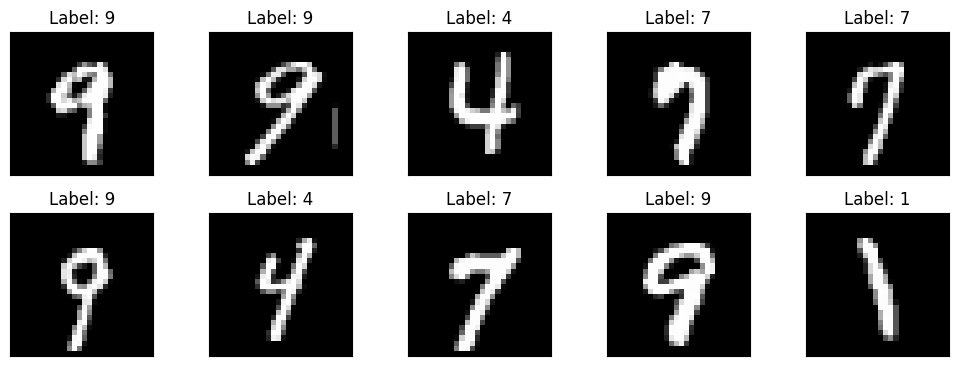

In [5]:
# Visualise Some Training Examples
# Get a batch of training data
examples = iter(train_loader)
example_data, example_targets = next(examples)

# Create a figure to display the images
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Label: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Train the Model (only run for 2 epochs to keep it quick)
# Create model
model = MNISTClassifier()

# Train model
print("Starting model training...")
trained_model, history = train_model(model, train_loader, test_loader, epochs=2)

print("Training completed successfully!")

Starting model training...
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.286061
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.820093
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.564211
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.296636
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.814258
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.215802
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.228776
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.188323
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.322244
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.081532
Epoch 1: Train Loss: 0.5300, Test Loss: 0.1281, Test Accuracy: 96.11%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.201612
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.189218
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.107840
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.264205
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.049332
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.198286
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.137971
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.192175
Train Epoch: 2 